In [2]:
import pandas as pd
import ast
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer
import datetime
import joblib
import pickle
import sklearn

#Bangalore 

In [2]:
#file paths
input_path = "bangalore_cars.xlsx"
output_path = "bangalore_structured.csv"

In [3]:
df=pd.read_excel(input_path)
df.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [4]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
bangalore_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
bangalore_structured["City"] = "Bangalore"

# Save the dataframe to a csv file
bangalore_structured.to_csv(output_path, index=False)
print(bangalore_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

#CHENNAI

In [5]:
#file paths
input_path = "chennai_cars.xlsx"
output_path = "chennai_structured.csv"

In [6]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
chennai_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
chennai_structured["City"] = "Chennai"

# Save the dataframe to a csv file
chennai_structured.to_csv(output_path, index=False)

print(chennai_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

In [7]:
#file paths
input_path = "delhi_cars.xlsx"
output_path = "delhi_structured.csv"
df=pd.read_excel(input_path)

In [8]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
delhi_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
delhi_structured["City"] = "Delhi"

# Save the dataframe to a csv file
delhi_structured.to_csv(output_path, index=False)

print(delhi_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Diesel        SUV  10,000    Automatic        1  1st Owner   
1      0  Petrol        SUV  57,437       Manual        2  2nd Owner   
2      0  Petrol        SUV   8,000    Automatic        1  1st Owner   
3      0  Petrol  Hatchback  28,151       Manual        2  2nd Owner   
4      0  Petrol        SUV  60,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1480   0  Petrol      Sedan  60,000    Automatic        1  1st Owner   
1481   0  Petrol        SUV  20,000       Manual        1  1st Owner   
1482   0  Petrol      Sedan  60,000       Manual        1  1st Owner   
1483   0  Diesel        SUV  38,000       Manual        1  1st Owner   
1484   0  Diesel        SUV   7,000    Automatic        0  0th Owner   

                oem              model  modelYear  ...  data_1_list_8_key  \
0               Kia         Kia Seltos       2022  ...    

In [9]:
#file paths
input_path = "hyderabad_cars.xlsx"
output_path = "hyderabad_structured.csv"

df=pd.read_excel(input_path)

In [10]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
hyderabad_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
hyderabad_structured["City"] = "Hyberabad"

# Save the dataframe to a csv file
hyderabad_structured.to_csv(output_path, index=False)

print(hyderabad_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1478   0  Diesel        SUV    60,000       Manual        1  1st Owner   
1479   0  Diesel      Sedan    50,000    Automatic        1  1st Owner   
1480   0  Diesel      Sedan  1,20,000    Automatic        3  3rd Owner   
1481   0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
1482   0  Diesel        MUV  1,00,000       Manual        1  1st Owner   

             oem            model  modelYear  ...  data_2_list_10_value  \
0     Volkswagen  Volkswagen Polo   

In [11]:
#file paths
input_path = "jaipur_cars.xlsx"
output_path = "jaipur_structured.csv"
df=pd.read_excel(input_path)

In [12]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
jaipur_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
jaipur_structured["City"] = "Jaipur"

# Save the dataframe to a csv file
jaipur_structured.to_csv(output_path, index=False)

print(jaipur_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

In [13]:
#file paths
input_path = "kolkata_cars.xlsx"
output_path = "kolkata_structured.csv"
df=pd.read_excel(input_path)

In [14]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
kolkata_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
kolkata_structured["City"] = "Kolkata"

# Save the dataframe to a csv file
kolkata_structured.to_csv(output_path, index=False)

print(kolkata_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol      Sedan    70,000    Automatic        3  3rd Owner   
1      0  Petrol  Hatchback    23,981       Manual        1  1st Owner   
2      0  Petrol        SUV     7,100    Automatic        1  1st Owner   
3      0  Petrol  Hatchback    71,574       Manual        2  2nd Owner   
4      0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1376   0  Petrol  Hatchback    10,000       Manual        1  1st Owner   
1377   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1378   0  Petrol      Sedan    50,000    Automatic        3  3rd Owner   
1379   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1380   0  Diesel        SUV  1,20,000       Manual        2  2nd Owner   

                oem                  model  modelYear  ...  \
0            Toyota           Toyota Camry       

In [15]:
# Combining all structured data

file_paths=["bangalore_structured.csv",
           "chennai_structured.csv",
           "delhi_structured.csv",
           "hyderabad_structured.csv",
           "jaipur_structured.csv",
           "kolkata_structured.csv"]

structured_df=[]

for file_path in file_paths:
    df=pd.read_csv(file_path)
    structured_df.append(df)
    
structured_df = pd.concat(structured_df, ignore_index=True)

output_path = "Car Dheko - Used Car Price Prediction structured_df.csv"
structured_df.to_csv(output_path, index=False)

print("sucessfully")

sucessfully


In [17]:
structured_df=pd.read_csv("Car Dheko - Used Car Price Prediction structured_df.csv")
import warnings
warnings.filterwarnings("ignore")

C:\Users\bswar\AppData\Local\Temp\ipykernel_25544\727885613.py:1: DtypeWarning: Columns (13,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,240,308,309,310,311,312,313,314,315,316,317,319) have mixed types. Specify dtype option on import or set low_memory=False.
  structured_df=pd.read_csv("Car Dheko - Used Car Price Prediction structured_df.csv")


In [18]:
structured_df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_0_list_36_value,data_3_list_45_value,data_3_list_46_value,data_3_list_47_value,data_1_list_9_key,data_1_list_9_value.1,data_1_list_10_key,data_1_list_10_value.1,data_1_list_11_key,data_1_list_11_value.1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
structured_df.isnull().mean()*100

it                         0.000000
ft                         0.000000
bt                         0.047444
km                         0.000000
transmission               0.000000
                            ...    
data_1_list_9_value.1     99.952556
data_1_list_10_key        99.952556
data_1_list_10_value.1    99.952556
data_1_list_11_key        99.952556
data_1_list_11_value.1    99.952556
Length: 321, dtype: float64

In [20]:
structured_df.shape

(8431, 321)

In [21]:
#drop columns with more than 50% nan values
threshold=len(structured_df) * 0.5
structured_df=structured_df.dropna(thresh=threshold, axis=1)

In [22]:
structured_df.shape

(8431, 216)

In [23]:
structured_df.duplicated().sum()

0

In [24]:
# checking and treating missing values
structured_df["price"].isnull().sum()

0

In [25]:
structured_df["bt"].value_counts()

bt
Hatchback        3647
SUV              2282
Sedan            2105
MUV               340
Minivans           28
Coupe              10
Pickup Trucks       7
Convertibles        7
Wagon               1
Name: count, dtype: int64

In [26]:
structured_df["bt"].fillna(structured_df["bt"].mode()[0],inplace=True)

In [27]:
structured_df["ownerNo"].isnull().sum()

0

In [28]:
structured_df["oem"].isnull().sum()

0

In [29]:
structured_df["model"].isnull().sum()
structured_df["modelYear"].isnull().sum()
structured_df["variantName"].isnull().sum()

0

In [30]:
#coversion type for price
structured_df["price"] =structured_df["price"].apply(lambda x: re.sub(r'[₹,]','',x).strip())

In [31]:
structured_df["price"]

0          4 Lakh
1       8.11 Lakh
2       5.85 Lakh
3       4.62 Lakh
4       7.90 Lakh
          ...    
8426    5.10 Lakh
8427    1.80 Lakh
8428    5.50 Lakh
8429    1.40 Lakh
8430       5 Lakh
Name: price, Length: 8431, dtype: object

In [32]:
# function to change lakh and crore to numbers
def price_cov(price):
    if "Lakh" in price:
        cleaned_price = re.sub(r'Lakh', '', price).strip()
        return float(cleaned_price)*100000
    elif "Crore" in price:
        cleaned_price = re.sub(r'Crore', '', price).strip()
        return float(cleaned_price)*10000000
structured_df["price"] = structured_df["price"].apply(price_cov)

In [33]:
structured_df["price"].value_counts()

price
650000.0     106
300000.0     101
500000.0      98
400000.0      95
600000.0      91
            ... 
8200000.0      1
832000.0       1
2790000.0      1
1570000.0      1
1082000.0      1
Name: count, Length: 1277, dtype: int64

In [34]:
structured_df["km"]= structured_df["km"].str.replace("kms","").str.replace(",","").astype(float)

In [35]:
structured_df["km"].isnull().sum()

0

In [36]:
#clean mileage from top_0_value.2
def car_mileage(mileage):
    try:
        mileage_cleaned = re.sub(r"(kmpl|km/mg)", "", str(mileage)).strip()
        mileage_float = float(mileage_cleaned)
        return mileage_float if mileage_float < 100 else np.nan
    except ValueError:
        return np.nan

In [37]:
structured_df["mileage"] =structured_df["top_0_value.2"].apply(car_mileage)

In [38]:
structured_df["mileage"].isnull().mean()*100

3.795516546079943

In [39]:
#replacing null value with mean value
structured_df["mileage"].fillna(structured_df["mileage"].mean(),inplace=True)

In [40]:
#car seat

def car_seats(seats):
    try:
        seat_s = re.search(r'\d+', str(seats))
        if seat_s:
            seats_int = int(seat_s.group())
            if seats_int < 10:
                return seats_int
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

In [41]:
structured_df["seats"]=structured_df["top_3_value"].apply(car_seats)

In [42]:
structured_df["seats"].isnull().sum()

43

In [43]:
structured_df["seats"].value_counts()

seats
5.0    7358
7.0     745
4.0     103
6.0      91
8.0      67
9.0      11
2.0       7
1.0       6
Name: count, dtype: int64

In [44]:
#replacing null value with mode value
structured_df["seats"].fillna(structured_df["seats"].mode()[0], inplace=True)

In [45]:
structured_df["seats"].isnull().sum()

0

In [46]:
#assigning the values from one column to another column
structured_df["Insurance Validity"] =structured_df["top_1_value"]

In [47]:
#assigning the values from one column to another column
structured_df["Engine_type"]=structured_df["data_0_list_1_value.1"]

In [48]:
structured_df["Engine_type"].value_counts()

Engine_type
In-Line Engine                513
Kappa VTVT Petrol Engine      451
Petrol Engine                 306
i-VTEC Petrol Engine          244
VVT Petrol Engine             211
                             ... 
2446                            1
2112                            1
D22DTR                          1
1.3 L HR13DDT Turbo Petrol      1
Blue Efficiency Engine          1
Name: count, Length: 517, dtype: int64

In [49]:
structured_df["Engine_type"].isnull().sum()

0

In [50]:
#assigning the values from one column to another column
structured_df["Engine_displacement"]=structured_df["data_0_list_2_value.1"]

In [51]:
structured_df['Engine_displacement'] = pd.to_numeric(structured_df['Engine_displacement'], errors='coerce')

In [52]:
structured_df["Engine_displacement"].isnull().sum()

248

In [53]:
structured_df= structured_df.dropna(subset=['Engine_displacement'])

In [54]:
structured_df["Engine_displacement"].isnull().sum()

0

In [55]:
#dropping columns
structured_df.drop(["top_3_value","top_0_value.2","data_0_list_2_value.1","top_1_value","data_0_list_1_value.1"],axis=1,inplace=True)

In [56]:
#renaming the columns

structured_df.rename(columns={
    'ft': 'Fuel_type',
    'bt': 'Body_type',
    'km': 'Kilometers'
}, inplace=True)

In [57]:
#dropping the repeated column owner
structured_df.drop("owner",axis=1,inplace=True)

In [58]:
structured_df["centralVariantId"].isnull().sum()

0

In [59]:
structured_df["variantName"].isnull().sum()

0

In [60]:
final_df=structured_df[["Fuel_type","Body_type","Kilometers","transmission","ownerNo","oem","model","modelYear","centralVariantId","variantName","seats",
              "mileage","Insurance Validity","Engine_type","Engine_displacement","price","City"]]

In [61]:
final_df.head(5)

,Fuel_type,Body_type,Kilometers,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,seats,mileage,Insurance Validity,Engine_type,Engine_displacement,price,City
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,5.0,23.10,Third Party insurance,K10B Engine,998.0,400000.0,Bangalore
1,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,5.0,17.00,Comprehensive,Ti-VCT Petrol Engine,1497.0,811000.0,Bangalore
2,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,5.0,23.84,Comprehensive,Revotron Engine,1199.0,585000.0,Bangalore
3,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,5.0,19.10,Comprehensive,Kappa VTVT Petrol Engine,1197.0,462000.0,Bangalore
4,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,5.0,23.65,Third Party insurance,DDiS 200 Diesel Engine,1248.0,790000.0,Bangalore


In [62]:
output_file= "Car final_df.csv"
final_df.to_csv(output_file,index=False)

#DATA VISUALIZATION

In [63]:
df=pd.read_csv("Car final_df.csv")
df.head()

,Fuel_type,Body_type,Kilometers,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,seats,mileage,Insurance Validity,Engine_type,Engine_displacement,price,City
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,5.0,23.10,Third Party insurance,K10B Engine,998.0,400000.0,Bangalore
1,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,5.0,17.00,Comprehensive,Ti-VCT Petrol Engine,1497.0,811000.0,Bangalore
2,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,5.0,23.84,Comprehensive,Revotron Engine,1199.0,585000.0,Bangalore
3,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,5.0,19.10,Comprehensive,Kappa VTVT Petrol Engine,1197.0,462000.0,Bangalore
4,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,5.0,23.65,Third Party insurance,DDiS 200 Diesel Engine,1248.0,790000.0,Bangalore


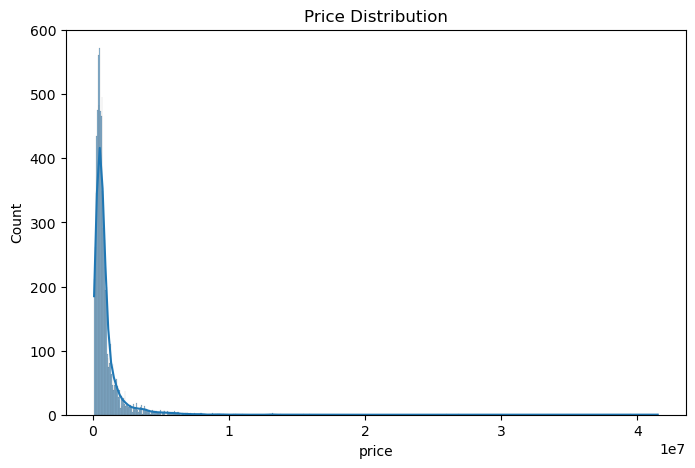

In [65]:
#histogram for price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"],kde=True)
plt.title("Price Distribution")
plt.show()

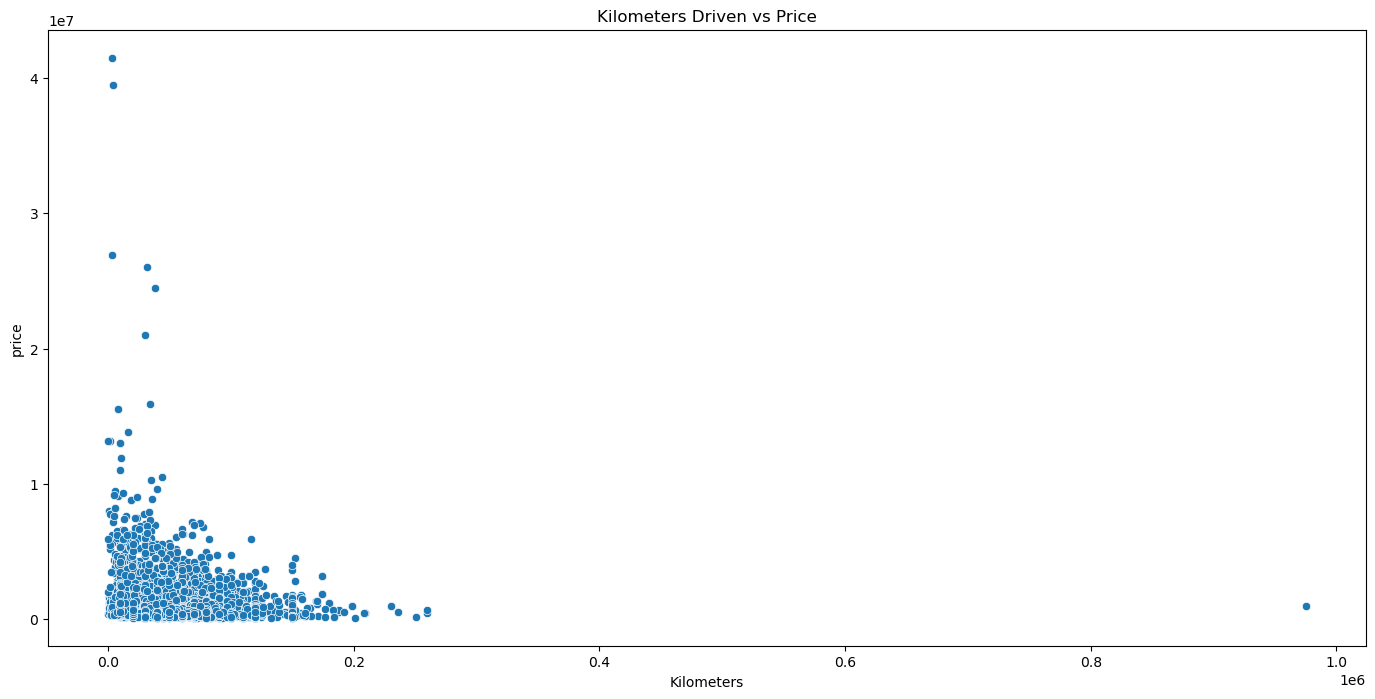

In [66]:
#scatterplot for km vs price
plt.figure(figsize=(17, 8))
sns.scatterplot(data=df,x="Kilometers",y="price")
plt.title("Kilometers Driven vs Price")
plt.show()

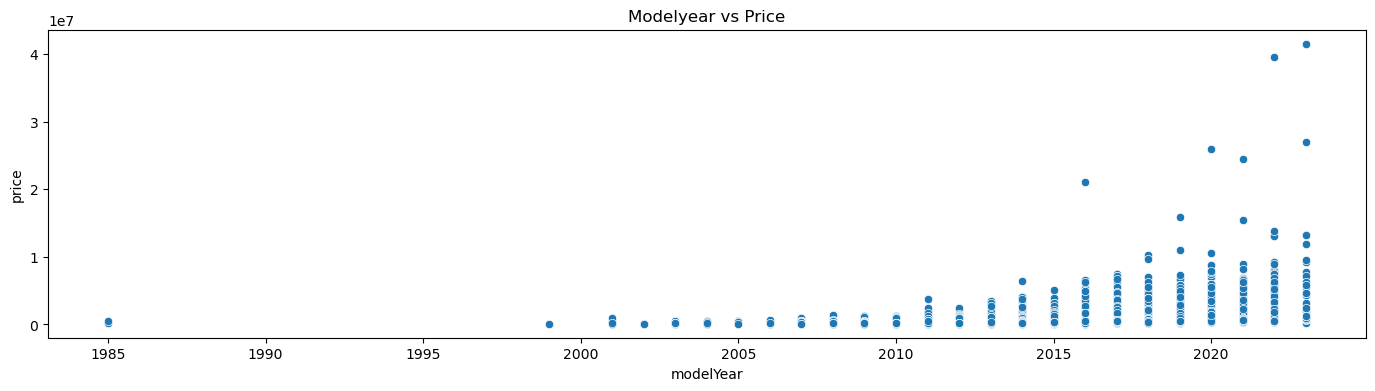

In [67]:
#modelyear vs Price
plt.figure(figsize=(17, 4))
sns.scatterplot(data=df,x="modelYear",y="price")
plt.title("Modelyear vs Price")
plt.show()

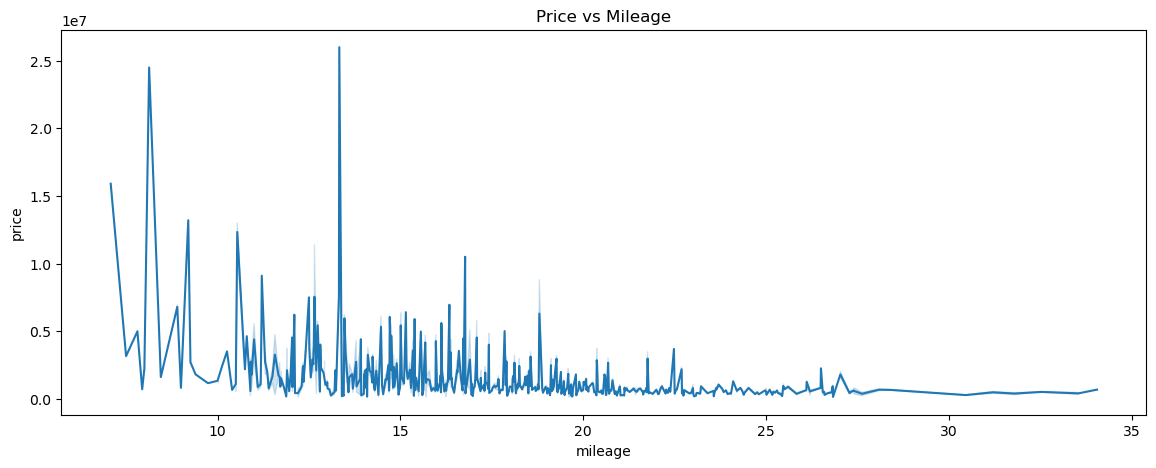

In [68]:
#scatterplot price vs mileage

plt.figure(figsize=(14, 5))
sns.lineplot(data=df,x="mileage", y="price")
plt.title("Price vs Mileage")
plt.show()

#OUTLIERS

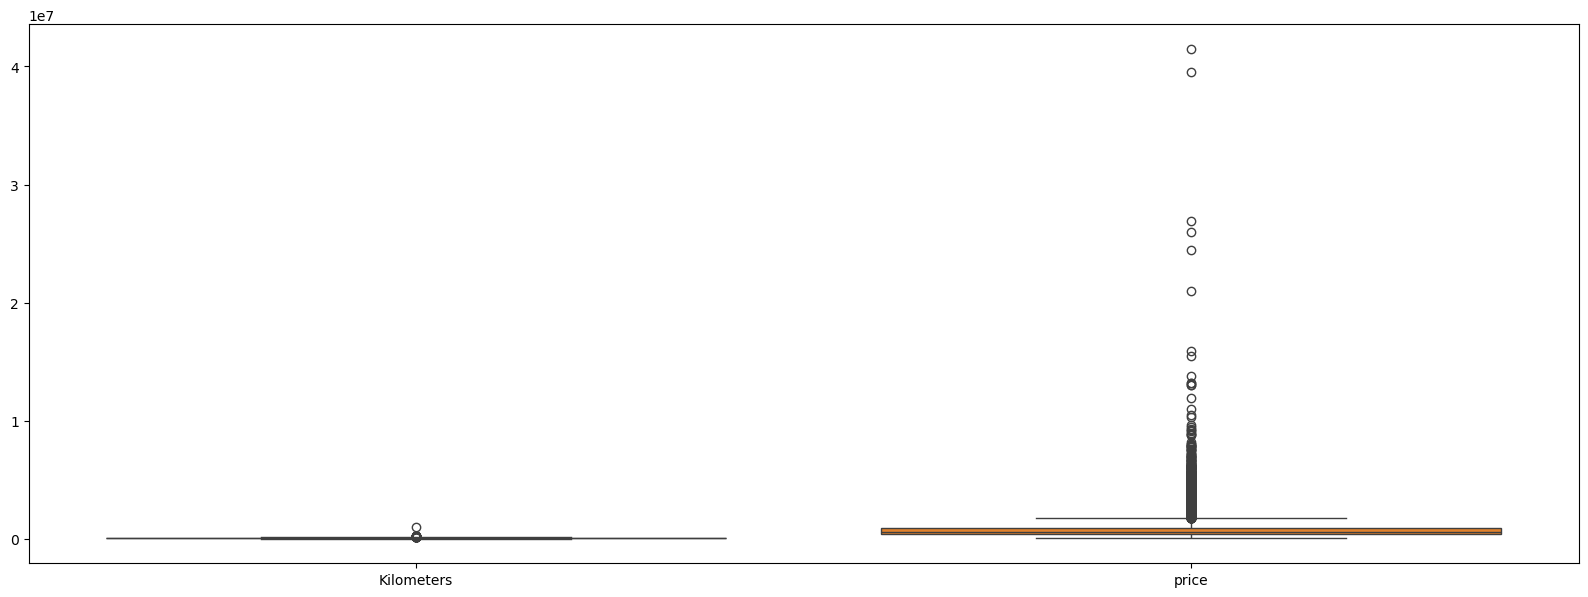

In [69]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df[["Kilometers","price"]])
plt.show()

In [70]:
def outliers(df1,column):
    q1=df1[column].quantile(0.25)
    q3=df1[column].quantile(0.75)
    IQR = q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    return df1[(df1[column]>=lower)&(df1[column]<=upper)]
kilo =outliers(df,"Kilometers")
price=outliers(kilo,"price")
df=price

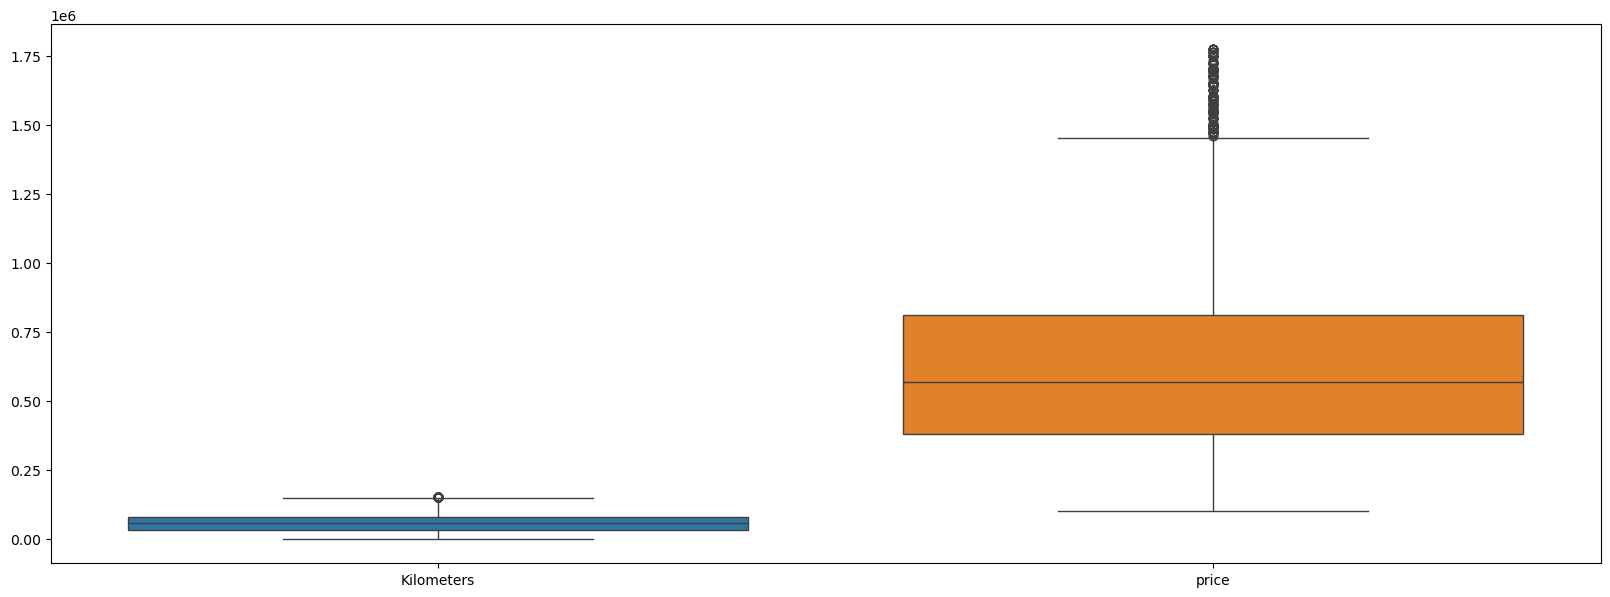

In [71]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df[["Kilometers","price"]])
plt.show()

#ENCODING

In [72]:
df.head(3)

,Fuel_type,Body_type,Kilometers,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,seats,mileage,Insurance Validity,Engine_type,Engine_displacement,price,City
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,5.0,23.10,Third Party insurance,K10B Engine,998.0,400000.0,Bangalore
1,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,5.0,17.00,Comprehensive,Ti-VCT Petrol Engine,1497.0,811000.0,Bangalore
2,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,5.0,23.84,Comprehensive,Revotron Engine,1199.0,585000.0,Bangalore


In [73]:
df.select_dtypes(include=["object"]).columns

Index(['Fuel_type', 'Body_type', 'transmission', 'oem', 'model', 'variantName',
       'Insurance Validity', 'Engine_type', 'City'],
      dtype='object')

In [74]:
categorical_columns = ['Body_type', 'transmission', 'model', 'variantName', 
                       'Fuel_type', 'Insurance Validity', 'Engine_type', 'City'] 

In [75]:
label_encoders = {}

In [76]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [77]:
# Save the dictionary of label encoders
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7198 entries, 0 to 8182
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fuel_type            7198 non-null   int32  
 1   Body_type            7198 non-null   int32  
 2   Kilometers           7198 non-null   float64
 3   transmission         7198 non-null   int32  
 4   ownerNo              7198 non-null   int64  
 5   oem                  7198 non-null   object 
 6   model                7198 non-null   int32  
 7   modelYear            7198 non-null   int64  
 8   centralVariantId     7198 non-null   int64  
 9   variantName          7198 non-null   int32  
 10  seats                7198 non-null   float64
 11  mileage              7198 non-null   float64
 12  Insurance Validity   7198 non-null   int32  
 13  Engine_type          7198 non-null   int32  
 14  Engine_displacement  7198 non-null   float64
 15  price                7198 non-null   float6

In [79]:
#scaler

mm =MinMaxScaler()

In [80]:
Scaler_encoder=df[["Kilometers","ownerNo","modelYear","centralVariantId","seats","mileage","Engine_displacement"]]

In [81]:
df["Engine_displacement"]

0        998.0
1       1497.0
2       1199.0
3       1197.0
4       1248.0
         ...  
8178     998.0
8179     796.0
8180    1796.0
8181    1197.0
8182    1461.0
Name: Engine_displacement, Length: 7198, dtype: float64

In [82]:
Scaler_encoder=mm.fit_transform(df[["Kilometers","ownerNo","modelYear","centralVariantId","seats","mileage","Engine_displacement"]])

In [83]:
scaled_df = pd.DataFrame(Scaler_encoder, columns=["Kilometers","ownerNo","modelYear","centralVariantId","seats","mileage","Engine_displacement"])

In [84]:
scaled_df.head()

,Kilometers,ownerNo,modelYear,centralVariantId,seats,mileage,Engine_displacement
0,0.784278,0.6,0.789474,0.357491,0.5,0.580620,0.1996
1,0.213755,0.4,0.868421,0.547744,0.5,0.346993,0.2994
2,0.078094,0.2,0.868421,0.267599,0.5,0.608962,0.2398
3,0.116295,0.2,0.763158,0.166877,0.5,0.427422,0.2394
4,0.392139,0.2,0.789474,0.384386,0.5,0.601685,0.2496


In [85]:
#saved scaled_df
with open('scaled_df.pkl', 'wb') as f:
    pickle.dump(scaled_df, f)

In [86]:
#encoding price separately  
scaler = MinMaxScaler()
df['price'] = scaler.fit_transform(df[['price']])

# Save the scaler object itself to use inverse_transform later
with open('price.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [87]:
output_file= "encoded.csv"
df.to_csv(output_file,index=False)

#FEATURE ENGINEERING

In [5]:
X=pd.read_csv("encoded.csv")

In [6]:
X.head(3)

,Fuel_type,Body_type,Kilometers,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,seats,mileage,Insurance Validity,Engine_type,Engine_displacement,price,City
0,4,2,120000.0,1,3,Maruti,118,2015,3979,1299,5.0,23.10,7,224,998.0,0.179104,0
1,4,6,32706.0,1,2,Ford,36,2018,6087,260,5.0,17.00,2,308,1497.0,0.424478,0
2,4,2,11949.0,1,1,Tata,197,2018,2983,120,5.0,23.84,2,274,1199.0,0.289552,0


In [7]:
y = X["price"]  
X = X.drop("price", axis=1) 

In [8]:
X.shape

(7198, 16)

In [9]:
y.shape

(7198,)

In [10]:
X.drop("oem",axis=1,inplace=True)

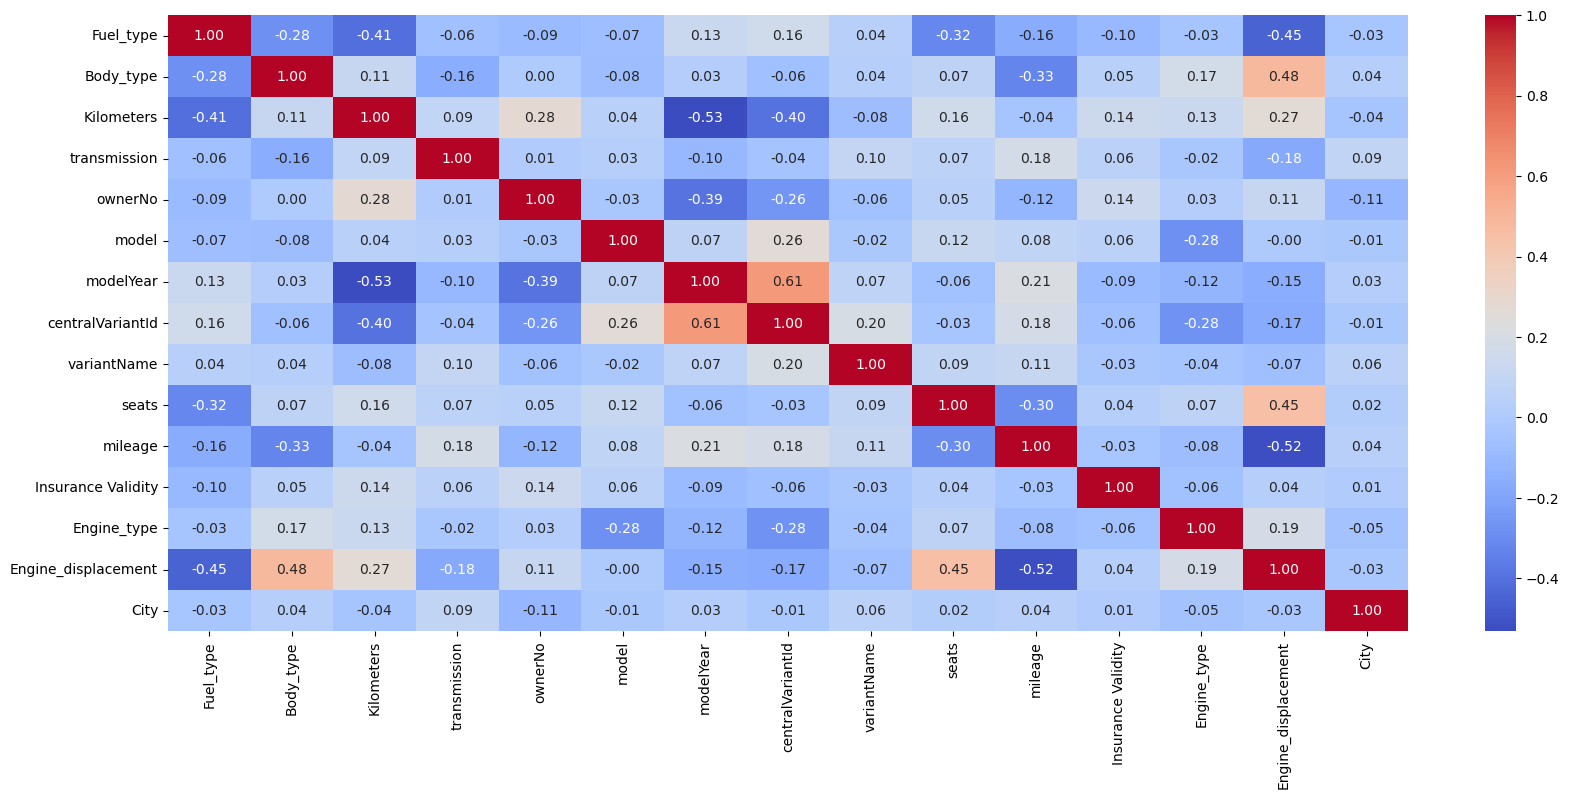

In [11]:
#feature selection univariate 
plt.figure(figsize=(20,8))
sns.heatmap(data=X.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [12]:
fs= RandomForestRegressor(n_estimators=400,random_state=45,max_depth=5)

In [13]:
fs.fit(X,y)

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=45)

In [14]:
fs.feature_importances_

array([3.07013397e-06, 3.27805636e-01, 6.57538626e-04, 3.17874708e-02,
       1.40357210e-04, 3.58757669e-03, 3.62968359e-01, 1.97287015e-02,
       3.25293142e-03, 1.97791589e-04, 1.55609656e-02, 3.40986728e-05,
       8.11090313e-03, 2.17376560e-01, 8.78803968e-03])

In [15]:
fs_score=pd.DataFrame({
    "columns":X.columns,
    "score":fs.feature_importances_
}).sort_values("score",ascending=False)

In [16]:
fs_score

,columns,score
6,modelYear,0.362968
1,Body_type,0.327806
13,Engine_displacement,0.217377
3,transmission,0.031787
7,centralVariantId,0.019729
10,mileage,0.015561
14,City,0.008788
12,Engine_type,0.008111
5,model,0.003588
8,variantName,0.003253


In [17]:
list(fs_score.sort_values("score",ascending=False)["columns"].values)

['modelYear',
 'Body_type',
 'Engine_displacement',
 'transmission',
 'centralVariantId',
 'mileage',
 'City',
 'Engine_type',
 'model',
 'variantName',
 'Kilometers',
 'seats',
 'ownerNo',
 'Insurance Validity',
 'Fuel_type']

In [18]:
Selected_Features = list(fs_score.sort_values("score",ascending=False)["columns"].values)

In [19]:
X1= X[Selected_Features]

In [20]:
X1.shape

(7198, 15)

In [21]:
y.shape

(7198,)

#TRAIN TEST SPLIT

In [22]:
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=45)

In [23]:
X1_train.shape

(5758, 15)

In [24]:
X1_test.shape

(1440, 15)

In [109]:
#MODEL BUILDING

#LINEAR REGRESSION

model=LinearRegression() 

In [110]:
model.fit(X1_train,y_train)

LinearRegression()

In [111]:
#predicting for training and test

predict_train = model.predict(X1_train)
predict_test = model.predict(X1_test)

In [112]:
metrics = {
    "mean squared error":[mean_squared_error(y_train,predict_train), mean_squared_error(y_test,predict_test)],
    "mean absolute error":[mean_absolute_error(y_train,predict_train), mean_absolute_error(y_test,predict_test)],
    "r2 score":[r2_score(y_train,predict_train), r2_score(y_test,predict_test)],
}

In [113]:
Linear_regression=pd.DataFrame(metrics,index=["Training","Testing"])

In [114]:
Linear_regression

,mean squared error,mean absolute error,r2 score
Training,0.013293,0.085745,0.703629
Testing,0.013496,0.084619,0.702485


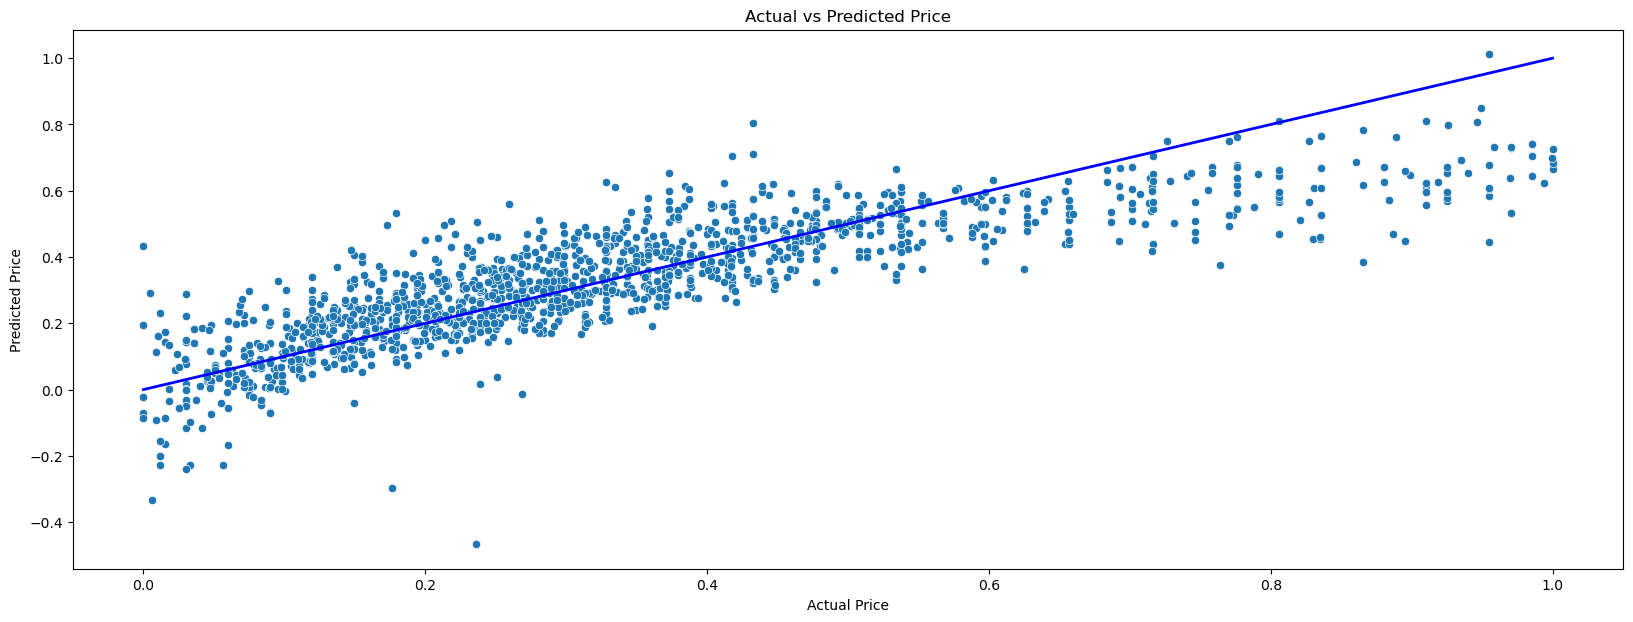

In [115]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=y_test,y=predict_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [116]:
#THERE IS NO OVERFITTING HERE.DOING REGULARIZATION TO SEE WHETHER I CAN IMPROVE THE PERFORMANCE

#LASSO

In [117]:
lasso_model= Lasso(alpha=0.01)

In [118]:
lasso_model.fit(X1_train,y_train)

Lasso(alpha=0.01)

In [119]:
lasso_train_predict= lasso_model.predict(X1_train)
lasso_test_predict= lasso_model.predict(X1_test)

In [120]:
metrics = {
    "mean squared error":[mean_squared_error(y_train,lasso_train_predict), mean_squared_error(y_test,lasso_test_predict)],
    "mean absolute error":[mean_absolute_error(y_train,lasso_train_predict), mean_absolute_error(y_test,lasso_test_predict)],
    "r2 score":[r2_score(y_train,lasso_train_predict), r2_score(y_test,lasso_test_predict)],
}

In [122]:
Lasso=pd.DataFrame(metrics,index=["Training","Testing"])

In [123]:
Lasso

,mean squared error,mean absolute error,r2 score
Training,0.014348,0.086759,0.680109
Testing,0.014664,0.085945,0.676733


In [124]:
# DECISION TREE

dt_model= DecisionTreeRegressor(max_depth=5,random_state=45)

In [125]:
dt_model.fit(X1_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=45)

In [126]:
dttrain_predict = dt_model.predict(X1_train)
dttest_predict = dt_model.predict(X1_test)

In [127]:
metrics = {
    "mean squared error":[mean_squared_error(y_train,dttrain_predict), mean_squared_error(y_test,dttest_predict )],
    "mean absolute error":[mean_absolute_error(y_train,dttrain_predict), mean_absolute_error(y_test,dttest_predict )],
    "r2 score":[r2_score(y_train,dttrain_predict), r2_score(y_test,dttest_predict )],
}

In [128]:
DT_model=pd.DataFrame(metrics,index=["Training","Testing"])

In [129]:
DT_model

,mean squared error,mean absolute error,r2 score
Training,0.011709,0.076919,0.738955
Testing,0.013327,0.080115,0.706219


In [ ]:
# RANDOM FOREST

In [130]:
fs

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=45)

In [131]:
fs.fit(X1_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=45)

In [132]:
random_train_predict = fs.predict(X1_train)
random_test_predict = fs.predict(X1_test)

In [133]:
metrics={
    "mean_squared_error":[mean_squared_error(y_train,random_train_predict),mean_squared_error(y_test,random_test_predict)],
    "mean_absolute_error":[mean_absolute_error(y_train,random_train_predict),mean_absolute_error(y_test,random_test_predict)],
    "r2_score":[r2_score(y_train,random_train_predict),r2_score(y_test,random_test_predict)]
}

In [134]:
random_model=pd.DataFrame(metrics,index=["Training","Testing"])

In [135]:
random_model

,mean_squared_error,mean_absolute_error,r2_score
Training,0.009903,0.071719,0.779228
Testing,0.010941,0.074258,0.758807


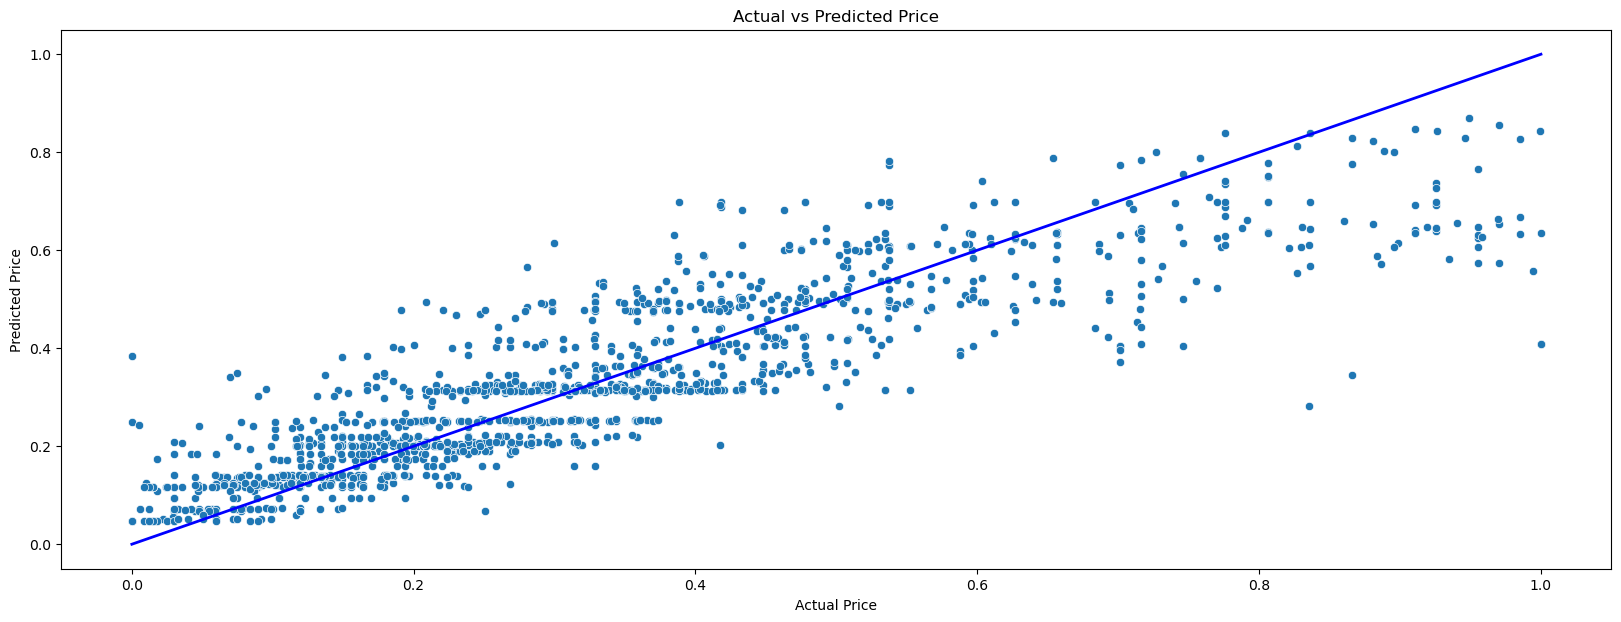

In [136]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=y_test,y=random_test_predict)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [25]:
# GRADIENT BOOSTING

gb= GradientBoostingRegressor(n_estimators=600,learning_rate=0.1,random_state=45,max_depth=5)


In [26]:
gb.fit(X1_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=600, random_state=45)

In [27]:
gb_train_predict=gb.predict(X1_train)
gb_test_predict=gb.predict(X1_test)

In [28]:
metrics={
    "mean_squared_error":[mean_squared_error(y_train,gb_train_predict),mean_squared_error(y_test,gb_test_predict)],
    "mean_absolute_error":[mean_absolute_error(y_train,gb_train_predict),mean_absolute_error(y_test,gb_test_predict)],
    "r2_score":[r2_score(y_train,gb_train_predict),r2_score(y_test,gb_test_predict)]
}

In [29]:
gradient_model=pd.DataFrame(metrics,index=["Training","Testing"])

In [30]:
gradient_model      

,mean_squared_error,mean_absolute_error,r2_score
Training,0.000383,0.014549,0.991465
Testing,0.002865,0.032430,0.936847


In [31]:
joblib.dump(gb, "gradient_model.joblib")

['gradient_model.joblib']

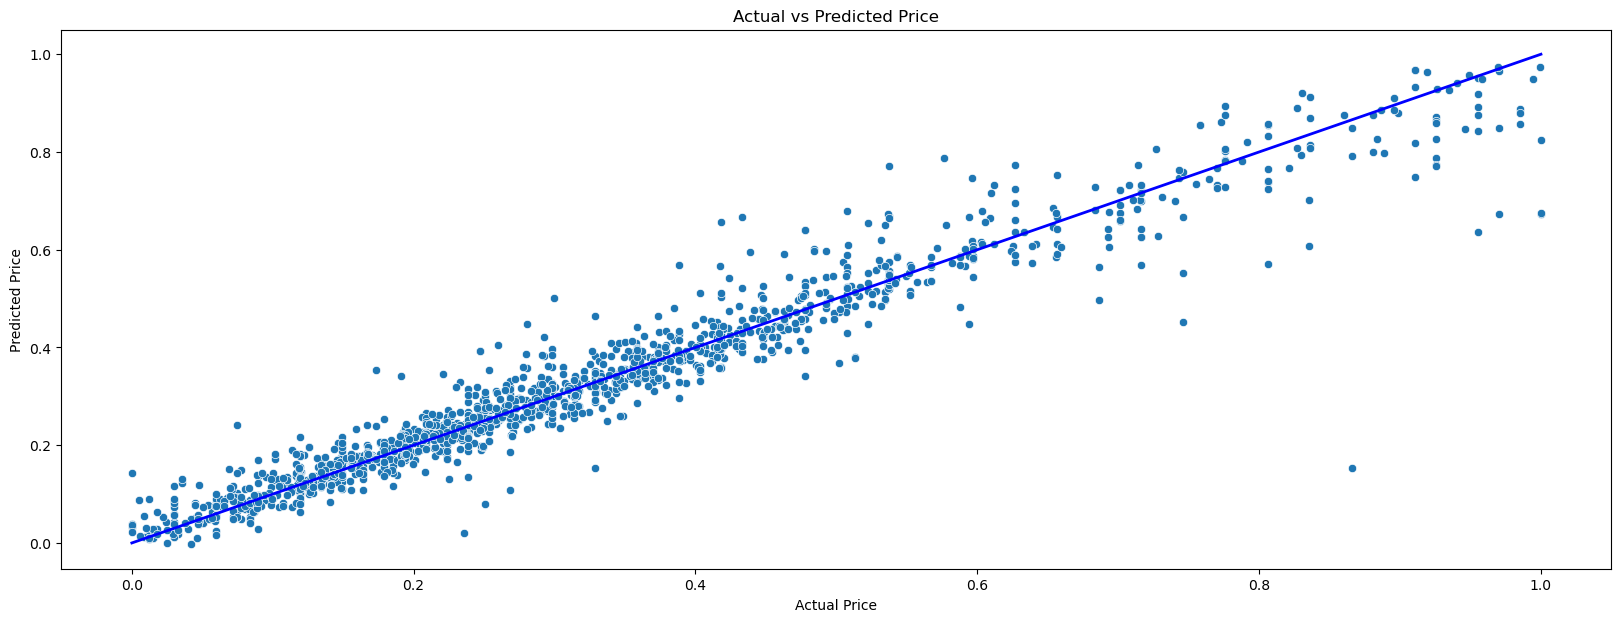

In [32]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=y_test,y=gb_test_predict)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [33]:
#hyperparameter tuning to check we can reduce the gap between train and test

In [34]:
# Define the hyperparameter grid
param_grid = {
    "n_estimators":[550,600,650],
    "learning_rate":[0.09, 0.1, 0.11],
    "max_depth":[3,4,5],
    "min_samples_split":[3, 4, 5],
    "min_samples_leaf":[3,4,5],
    "subsample":[0.7]
}

# Set up the cross-validation grid search
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid, 
                           scoring="neg_mean_squared_error",  # Use appropriate scoring for your problem
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1)  

# Fit the model to the training data
grid_search.fit(X1_train, y_train)

# Check the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
Train_prediction = best_model.predict(X1_train)
Test_prediction = best_model.predict(X1_test)

# Evaluate the model performance
metrics={
    "mean_squared_error":[mean_squared_error(y_train,Train_prediction),mean_squared_error(y_test,Test_prediction)],
    "mean_absolute_error":[mean_absolute_error(y_train,Train_prediction),mean_absolute_error(y_test,Test_prediction)],
    "r2_score":[r2_score(y_train,Train_prediction),r2_score(y_test,Test_prediction)]
}

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.11, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 650, 'subsample': 0.7}
Best Score: -0.0028655141936984917


In [35]:
gradient_grid_model=pd.DataFrame(metrics,index=["Training","Testing"])

In [36]:
gradient_grid_model

,mean_squared_error,mean_absolute_error,r2_score
Training,0.000331,0.013457,0.992630
Testing,0.002913,0.032309,0.935783


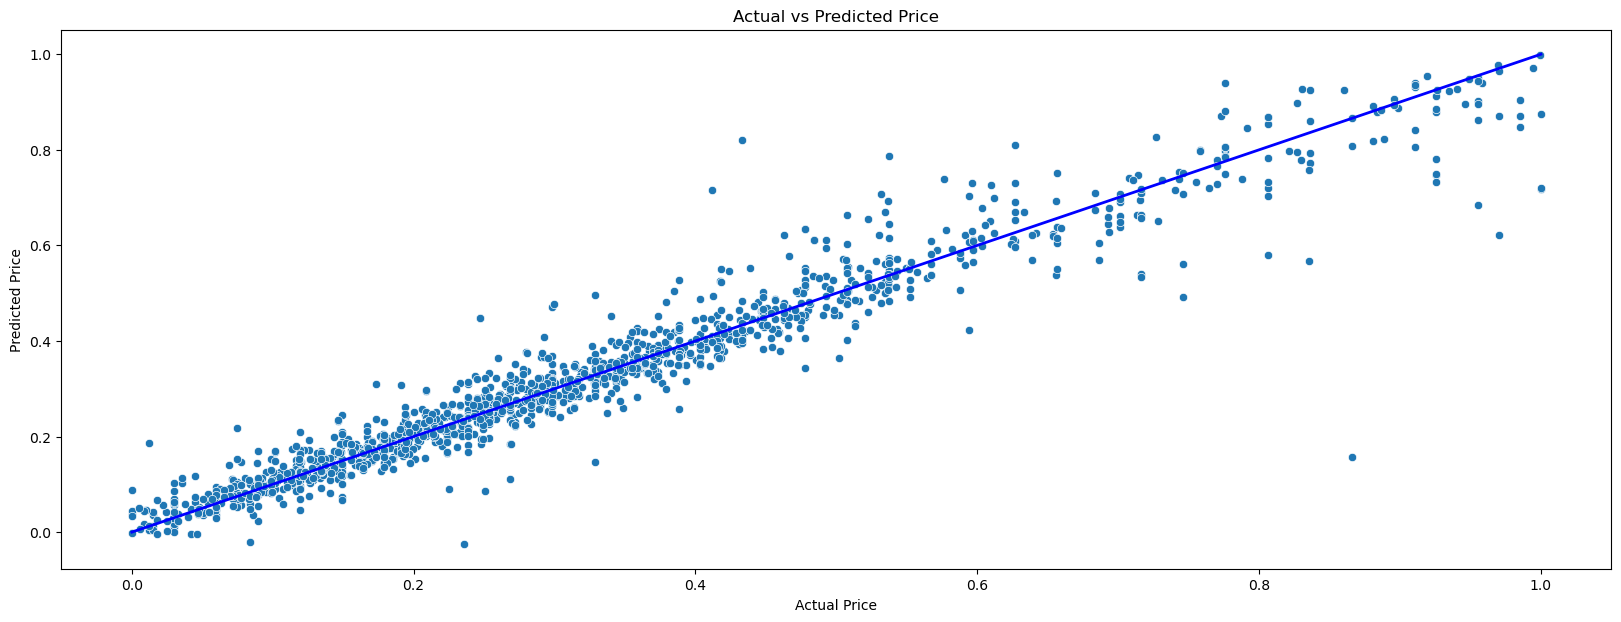

In [37]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=y_test,y=Test_prediction)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [38]:
#AFTER ALL TUNING GRADIENT BOOSTING SHOWS SIGNS OF OVERFITTING, NEXT WE GONNA DO FEATURE ENGINEERING TO REDUCE OVERFITTING

In [39]:
df=pd.read_csv("Car final_df.csv")
df.head(3)

,Fuel_type,Body_type,Kilometers,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,seats,mileage,Insurance Validity,Engine_type,Engine_displacement,price,City
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,5.0,23.10,Third Party insurance,K10B Engine,998.0,400000.0,Bangalore
1,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,5.0,17.00,Comprehensive,Ti-VCT Petrol Engine,1497.0,811000.0,Bangalore
2,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,5.0,23.84,Comprehensive,Revotron Engine,1199.0,585000.0,Bangalore


In [40]:
#calculating car age
current_year=datetime.datetime.now().year
df["car age"] =current_year-df["modelYear"].astype(int)

In [41]:
# model encoded feature
model_encoded=df.groupby("model")["price"].mean()
df["model encoded"]=df["model"].map(model_encoded)

In [42]:
df["Engine_displacement"] = pd.to_numeric(df["Engine_displacement"], errors='coerce')

In [43]:
#mileage engine
df["Mileage engine"]=df["mileage"]*df["Engine_displacement"]
df.head(3)

,Fuel_type,Body_type,Kilometers,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,seats,mileage,Insurance Validity,Engine_type,Engine_displacement,price,City,car age,model encoded,Mileage engine
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,5.0,23.10,Third Party insurance,K10B Engine,998.0,400000.0,Bangalore,10,443671.052632,23053.80
1,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,5.0,17.00,Comprehensive,Ti-VCT Petrol Engine,1497.0,811000.0,Bangalore,7,699236.686391,25449.00
2,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,5.0,23.84,Comprehensive,Revotron Engine,1199.0,585000.0,Bangalore,7,530608.695652,28584.16


In [44]:
df.isnull().sum()

Fuel_type                0
Body_type                0
Kilometers               0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
centralVariantId         0
variantName              0
seats                    0
mileage                  0
Insurance Validity       0
Engine_type              0
Engine_displacement      0
price                  120
City                     0
car age                  0
model encoded           12
Mileage engine           0
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.duplicated().sum()

112

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

0

In [49]:
#ENCODING
LE = LabelEncoder()

In [50]:
df.select_dtypes(include=["object"]).columns

Index(['Fuel_type', 'Body_type', 'transmission', 'oem', 'model', 'variantName',
       'Insurance Validity', 'Engine_type', 'City'],
      dtype='object')

In [51]:
categorical_columns =['Fuel_type', 'Body_type', 'transmission', 'oem', 'model', 'variantName',
       'Insurance Validity', 'Engine_type', 'City']

In [52]:
for i in categorical_columns:
    df[i]=LE.fit_transform(df[i])

In [53]:
df[categorical_columns]

,Fuel_type,Body_type,transmission,oem,model,variantName,Insurance Validity,Engine_type,City
0,4,2,1,20,147,1562,7,290,0
1,4,6,1,6,45,263,2,387,0
2,4,2,1,28,248,120,2,348,0
3,4,7,1,9,79,93,2,317,0
4,1,6,1,20,164,873,7,217,0
...,...,...,...,...,...,...,...,...,...
8178,4,2,1,20,147,1784,7,293,5
8179,4,2,1,20,142,1110,7,250,5
8180,4,7,0,21,181,790,7,194,5
8181,4,2,1,20,161,1800,7,286,5


In [54]:
le_encoder =df[categorical_columns]

In [55]:
# Saving label encoders and scalers (use 'wb' for write binary)
with open('le_encoder.pkl', 'wb') as f:
    pickle.dump(le_encoder, f)

In [56]:
# SCALER

MM =MinMaxScaler()

In [57]:
MM_encoded=df[["Kilometers","ownerNo","modelYear","centralVariantId","seats","mileage","Engine_displacement",
                   "car age","model encoded","Mileage engine"]] 

In [58]:
MM.fit_transform(MM_encoded)

array([[0.12307692, 0.6       , 0.78947368, ..., 0.21052632, 0.00826123,
        0.30282479],
       [0.03354462, 0.4       , 0.86842105, ..., 0.13157895, 0.01458868,
        0.3342871 ],
       [0.01225538, 0.2       , 0.86842105, ..., 0.13157895, 0.01041368,
        0.37546922],
       ...,
       [0.05128205, 0.6       , 0.68421053, ..., 0.31578947, 0.06530277,
        0.27696401],
       [0.04102564, 0.2       , 0.71052632, ..., 0.28947368, 0.00479963,
        0.29088062],
       [0.12307692, 0.4       , 0.84210526, ..., 0.15789474, 0.01264621,
        0.37844784]])

In [59]:
scale_df = pd.DataFrame(MM.fit_transform(MM_encoded), columns=["Kilometers","ownerNo","modelYear","centralVariantId","seats","mileage","Engine_displacement",
                   "car age","model encoded","Mileage engine"])

In [60]:
#saved scaled_df
with open('scale_df.pkl', 'wb') as f:
    pickle.dump(scale_df, f)

In [61]:
#encoding price separately  
engg_price=df[["price"]]
engg_price=MM.fit_transform(df[["price"]])
engg_price = pd.DataFrame(engg_price, columns=["price"])

In [62]:
#saved scaled_df
with open('engg_price.pkl', 'wb') as f:
    pickle.dump(engg_price, f)

In [63]:
#FEATURE IMPORTANCES

df.head(3)

,Fuel_type,Body_type,Kilometers,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,seats,mileage,Insurance Validity,Engine_type,Engine_displacement,price,City,car age,model encoded,Mileage engine
0,4,2,120000.0,1,3,20,147,2015,3979,1562,5.0,23.10,7,290,998.0,400000.0,0,10,443671.052632,23053.80
1,4,6,32706.0,1,2,6,45,2018,6087,263,5.0,17.00,2,387,1497.0,811000.0,0,7,699236.686391,25449.00
2,4,2,11949.0,1,1,28,248,2018,2983,120,5.0,23.84,2,348,1199.0,585000.0,0,7,530608.695652,28584.16


In [64]:
X2=df.drop("price",axis=1)

In [65]:
engg_price

,price
0,0.007246
1,0.017174
2,0.011715
3,0.008744
4,0.016667
...,...
7946,0.009903
7947,0.001932
7948,0.010870
7949,0.000966


In [66]:
y1= engg_price

In [67]:
#changing to 1D array
y1 = y1.squeeze()

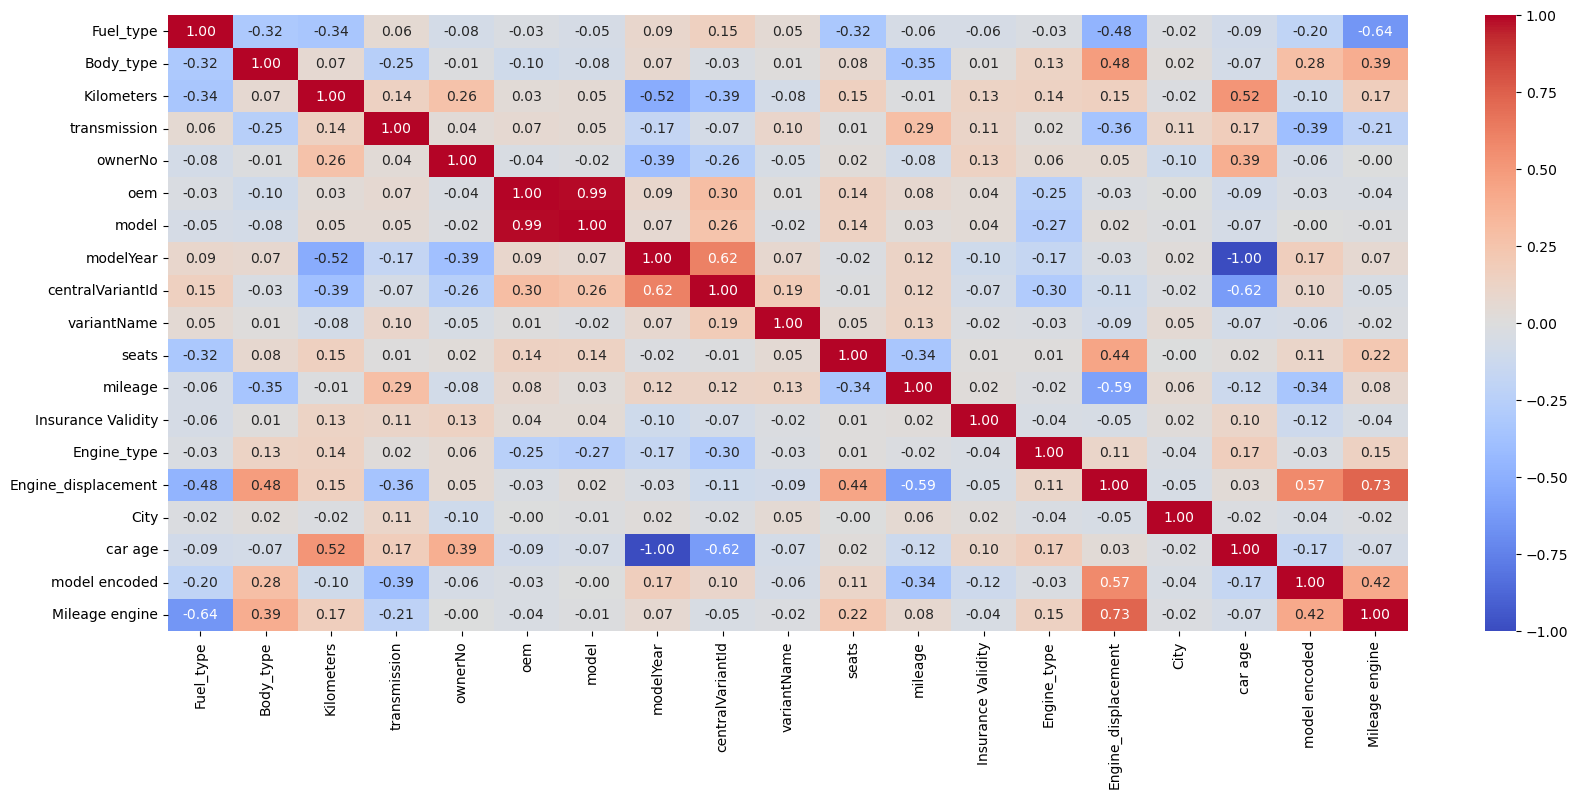

In [68]:
#feature selection univariate 
plt.figure(figsize=(20,8))
sns.heatmap(data=X2.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [69]:
X2.head(3)

,Fuel_type,Body_type,Kilometers,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,seats,mileage,Insurance Validity,Engine_type,Engine_displacement,City,car age,model encoded,Mileage engine
0,4,2,120000.0,1,3,20,147,2015,3979,1562,5.0,23.10,7,290,998.0,0,10,443671.052632,23053.80
1,4,6,32706.0,1,2,6,45,2018,6087,263,5.0,17.00,2,387,1497.0,0,7,699236.686391,25449.00
2,4,2,11949.0,1,1,28,248,2018,2983,120,5.0,23.84,2,348,1199.0,0,7,530608.695652,28584.16


In [70]:
fs.fit(X2,y1)

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=45)

In [71]:
fs.feature_importances_

array([5.25309666e-04, 3.18913991e-04, 6.72027694e-03, 3.35757858e-04,
       5.64941389e-05, 6.19301759e-04, 2.11969739e-03, 2.72691523e-02,
       7.18715460e-03, 1.73942395e-03, 4.28424384e-04, 3.44713056e-03,
       1.82446452e-04, 3.38264286e-03, 3.76720038e-03, 5.23947847e-04,
       2.53137255e-02, 9.08073741e-01, 7.98925825e-03])

In [72]:
fs_score=pd.DataFrame({
    "columns":X2.columns,
    "score":fs.feature_importances_
}).sort_values("score",ascending=False)

In [73]:
fs_score

,columns,score
17,model encoded,0.908074
7,modelYear,0.027269
16,car age,0.025314
18,Mileage engine,0.007989
8,centralVariantId,0.007187
2,Kilometers,0.006720
14,Engine_displacement,0.003767
11,mileage,0.003447
13,Engine_type,0.003383
6,model,0.002120


In [74]:
list(fs_score.sort_values("score",ascending=False)["columns"].values)

['model encoded',
 'modelYear',
 'car age',
 'Mileage engine',
 'centralVariantId',
 'Kilometers',
 'Engine_displacement',
 'mileage',
 'Engine_type',
 'model',
 'variantName',
 'oem',
 'Fuel_type',
 'City',
 'seats',
 'transmission',
 'Body_type',
 'Insurance Validity',
 'ownerNo']

In [75]:
X3= X2[['model encoded', 'modelYear','centralVariantId','Mileage engine','Engine_type',
 'Kilometers','variantName','model','mileage','City','Body_type',
 'City']]

In [76]:
X3.head()

,model encoded,modelYear,centralVariantId,Mileage engine,Engine_type,Kilometers,variantName,model,mileage,City,Body_type,City
0,443671.052632,2015,3979,23053.80,290,120000.0,1562,147,23.10,0,2,0
1,699236.686391,2018,6087,25449.00,387,32706.0,263,45,17.00,0,6,0
2,530608.695652,2018,2983,28584.16,348,11949.0,120,248,23.84,0,2,0
3,428911.111111,2014,1867,22862.70,317,17794.0,93,79,19.10,0,7,0
4,840965.517241,2015,4277,29515.20,217,60000.0,873,164,23.65,0,6,0


In [77]:
#TRAIN TEST SPLIT
X3_train,X3_test,y1_train,y1_test=train_test_split(X3,y1,test_size=0.2,random_state=45)

In [78]:
X3_train.shape

(6360, 12)

In [79]:
X3_test.shape

(1591, 12)

In [80]:
gb1= GradientBoostingRegressor(n_estimators=400,max_depth=5,learning_rate=0.07)

In [81]:
gb1.fit(X3_train,y1_train)            

GradientBoostingRegressor(learning_rate=0.07, max_depth=5, n_estimators=400)

In [82]:
gb1_train_predict=gb1.predict(X3_train)
gb1_test_predict=gb1.predict(X3_test)

In [83]:
metrics={
    "mean_squared_error":[mean_squared_error(y1_train,gb1_train_predict),mean_squared_error(y1_test,gb1_test_predict)],
    "mean_absolute_error":[mean_absolute_error(y1_train,gb1_train_predict),mean_absolute_error(y1_test,gb1_test_predict)],
    "r2_score":[r2_score(y1_train,gb1_train_predict),r2_score(y1_test,gb1_test_predict)]
}

In [84]:
feature_gradient =pd.DataFrame(metrics,index=["Training","Testing"])

In [85]:
feature_gradient

,mean_squared_error,mean_absolute_error,r2_score
Training,0.000003,0.001291,0.996753
Testing,0.000110,0.002826,0.913183


In [87]:
# Define the hyperparameter grid
param_grid_1 = {
    "n_estimators":[500,600,450],
    "learning_rate":[0.06,0.07,0.08],
    "max_depth":[3,4,5],
    "min_samples_split":[3,4,5],
    "min_samples_leaf":[2,3,5],
    "subsample":[0.7]
}

# Set up the cross-validation grid search
grid_search_1 = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid_1, 
                           cv=5, 
                           scoring='r2',
                           n_jobs=-1,  # Use all processors for faster computation
                           verbose=1 )  

# Fit the model to the training data
grid_search_1.fit(X3_train, y1_train)

# Check the best parameters and score
print("Best Parameters:", grid_search_1.best_params_)
print("Best Score:", grid_search_1.best_score_)

# Use the best model for predictions
best_model = grid_search_1.best_estimator_
Train_prediction = best_model.predict(X3_train)
Test_prediction = best_model.predict(X3_test)

# Evaluate the model performance
metrics={
    "mean_squared_error":[mean_squared_error(y1_train,Train_prediction),mean_squared_error(y1_test,Test_prediction)],
    "mean_absolute_error":[mean_absolute_error(y1_train,Train_prediction),mean_absolute_error(y1_test,Test_prediction)],
    "r2_score":[r2_score(y1_train,Train_prediction),r2_score(y1_test,Test_prediction)]
}

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.08, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 450, 'subsample': 0.7}
Best Score: 0.9637991996754106


In [88]:
features_gradient =pd.DataFrame(metrics,index=["Training","Testing"]) 

In [89]:
features_gradient

,mean_squared_error,mean_absolute_error,r2_score
Training,0.000004,0.001375,0.996419
Testing,0.000061,0.002735,0.952227


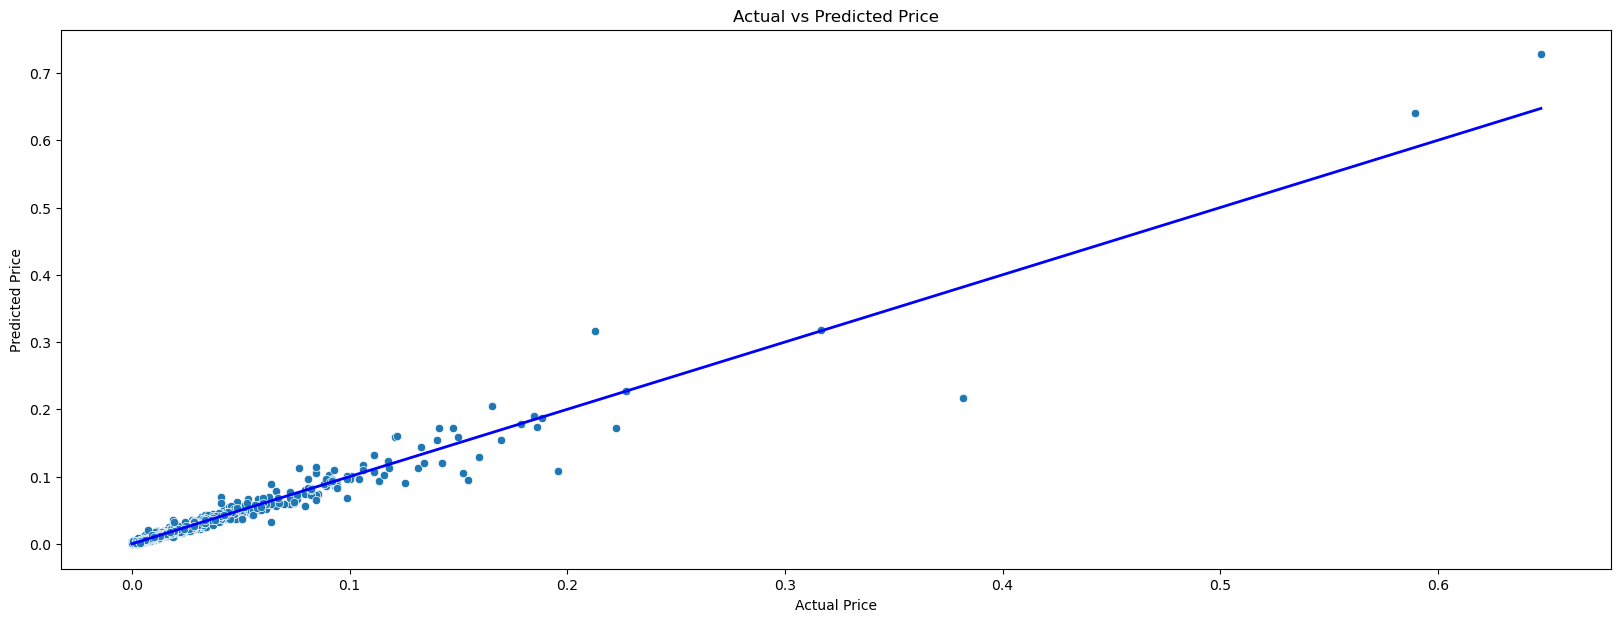

In [90]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=y1_test,y=Test_prediction)
plt.plot([y1_test.min(),y1_test.max()],[y1_test.min(),y1_test.max()],color="blue",lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [91]:
#saving the model
with open("gradient_grid_model.joblib", 'wb') as file:
    joblib.dump(gradient_grid_model, file)

In [92]:
sklearn.__version__  #file loads only with this versions

'1.5.2'

In [93]:
joblib.__version__

'1.4.2'

In [94]:
%run -i car.py

2025-01-11 11:43:05.463 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-11 11:43:05.463 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-11 11:43:05.463 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-11 11:43:05.481 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-11 11:43:05.482 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-01-11 11:43:05.482 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [ ]:
!streamlit run carprice.py

In [3]:
# Open and load the encoder
with open("gradient_model.joblib", "rb") as file:
    encoder = joblib.load(file)

# Now you can use the loaded encoder
print(encoder)

GradientBoostingRegressor(max_depth=5, n_estimators=600, random_state=45)


In [5]:
encoder

GradientBoostingRegressor(max_depth=5, n_estimators=600, random_state=45)

In [7]:
print("Model parameters:", encoder.get_params())

Model parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 600, 'n_iter_no_change': None, 'random_state': 45, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [8]:
print("Feature names used in training:", encoder.feature_names_in_)

Feature names used in training: ['modelYear' 'Body_type' 'Engine_displacement' 'transmission'
 'centralVariantId' 'mileage' 'City' 'Engine_type' 'model' 'variantName'
 'Kilometers' 'seats' 'ownerNo' 'Insurance Validity' 'Fuel_type']


In [10]:
with open("label_encoder.pkl", "rb") as file:
    encoder = pickle.load(file)

# Now you can use the loaded encoder
print(encoder)

{'Body_type': LabelEncoder(), 'transmission': LabelEncoder(), 'model': LabelEncoder(), 'variantName': LabelEncoder(), 'Fuel_type': LabelEncoder(), 'Insurance Validity': LabelEncoder(), 'Engine_type': LabelEncoder(), 'City': LabelEncoder()}


C:\Users\bswar\anaconda3\jupyter\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
